# Problem Statement

The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyse the strength
of each input variable's correlation with each of the output variables in order to discover
the most strongly associated input variables. We need to estimate HL and CL, we can
compare a traditional linear regression approach to a sophisticated state-of-the-art
nonlinear non-parametric method, random forests.

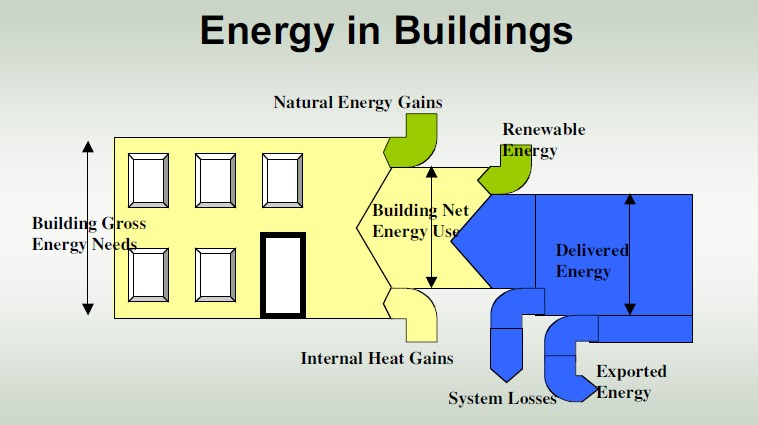

In [1]:
import numpy as np # Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
import statistics as st
from scipy.stats import pearsonr
from yellowbrick.regressor import PredictionError, ResidualsPlot
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel('ENB2012_data.xlsx') # Reading Dataset

In [3]:
df.head() # Sample Dataset

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2  Unnamed: 10  \
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33          NaN   
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33          NaN   
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33          NaN   
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33          NaN   
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28          NaN   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [4]:
# Removing useless columns
df1=df.drop(['Unnamed: 10','Unnamed: 11'], axis=1)

In [5]:
# Checking Sample Data set
df1.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [6]:
# assign name to columns
df1.columns=['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']

In [7]:
# After column name sample data
df1.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [8]:
ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Checking Complete Summary
round(df1.describe(),2)

Relative Compactness  Surface Area  Wall Area  Roof Area  \
count                768.00        768.00     768.00     768.00   
mean                   0.76        671.71     318.50     176.60   
std                    0.11         88.09      43.63      45.17   
min                    0.62        514.50     245.00     110.25   
25%                    0.68        606.38     294.00     140.88   
50%                    0.75        673.75     318.50     183.75   
75%                    0.83        741.12     343.00     220.50   
max                    0.98        808.50     416.50     220.50   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count          768.00       768.00        768.00                     768.00   
mean             5.25         3.50          0.23                       2.81   
std              1.75         1.12          0.13                       1.55   
min              3.50         2.00          0.00                       0.00   
25%              3.50         2.75          0.10                       1.75   
50%              5.25         3.50          0.25                       3.00   
75%              7.00         4.25          0.40                       4.00   
max              7.00         5.00          0.40                       5.00   

       Heating Load  Cooling Load  
count        768.00        768.00  
mean          22.31         24.59  
std           10.09          9.51  
min            6.01         10.90  
25%           12.99         15.62  
50%           18.95         22.08  
75%           31.67         33.13  
max           43.10         48.03

1. Total no. of observations are 768 nos.
2. Features are on different scale

In [10]:
# Checking dtype and null values 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


1. All the features are integer type and does not have null values.

In [11]:
# Checking duplicates value
df1.duplicated().sum()

0

In [12]:
# Separte data frame of numerical columns is prepared.
df_num=df1[['Relative Compactness','Surface Area','Wall Area','Glazing Area Distribution','Heating Load','Cooling Load']]

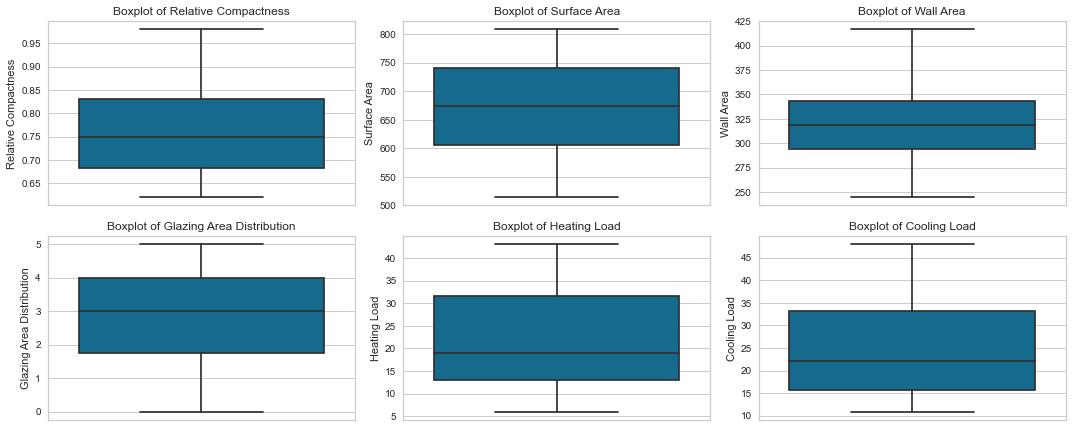

In [32]:
# Checking outliers
plt.figure(figsize=(15,12))
for i in range(len(df_num.columns)):
    plt.subplot (4,3, i+1)
    sns.boxplot(y=df_num.columns[i], data=df1)
    plt.title('Boxplot of {}'.format(df_num.columns[i]))
    plt.tight_layout()

1. Numerical features does not have outliers

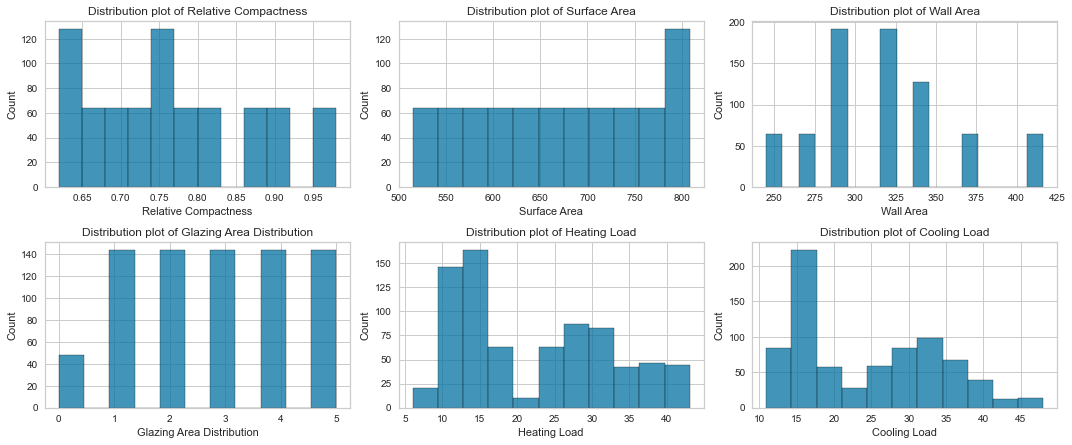

In [33]:
plt.figure(figsize=(15,12))
for i in range(len(df_num.columns)):
    plt.subplot (4,3, i+1)
    sns.histplot(x=df_num.columns[i], data=df_num)
    plt.title('Distribution plot of {}'.format(df_num.columns[i]))
    plt.tight_layout()

1. Features are not normally distributed

<Figure size 1080x720 with 0 Axes>

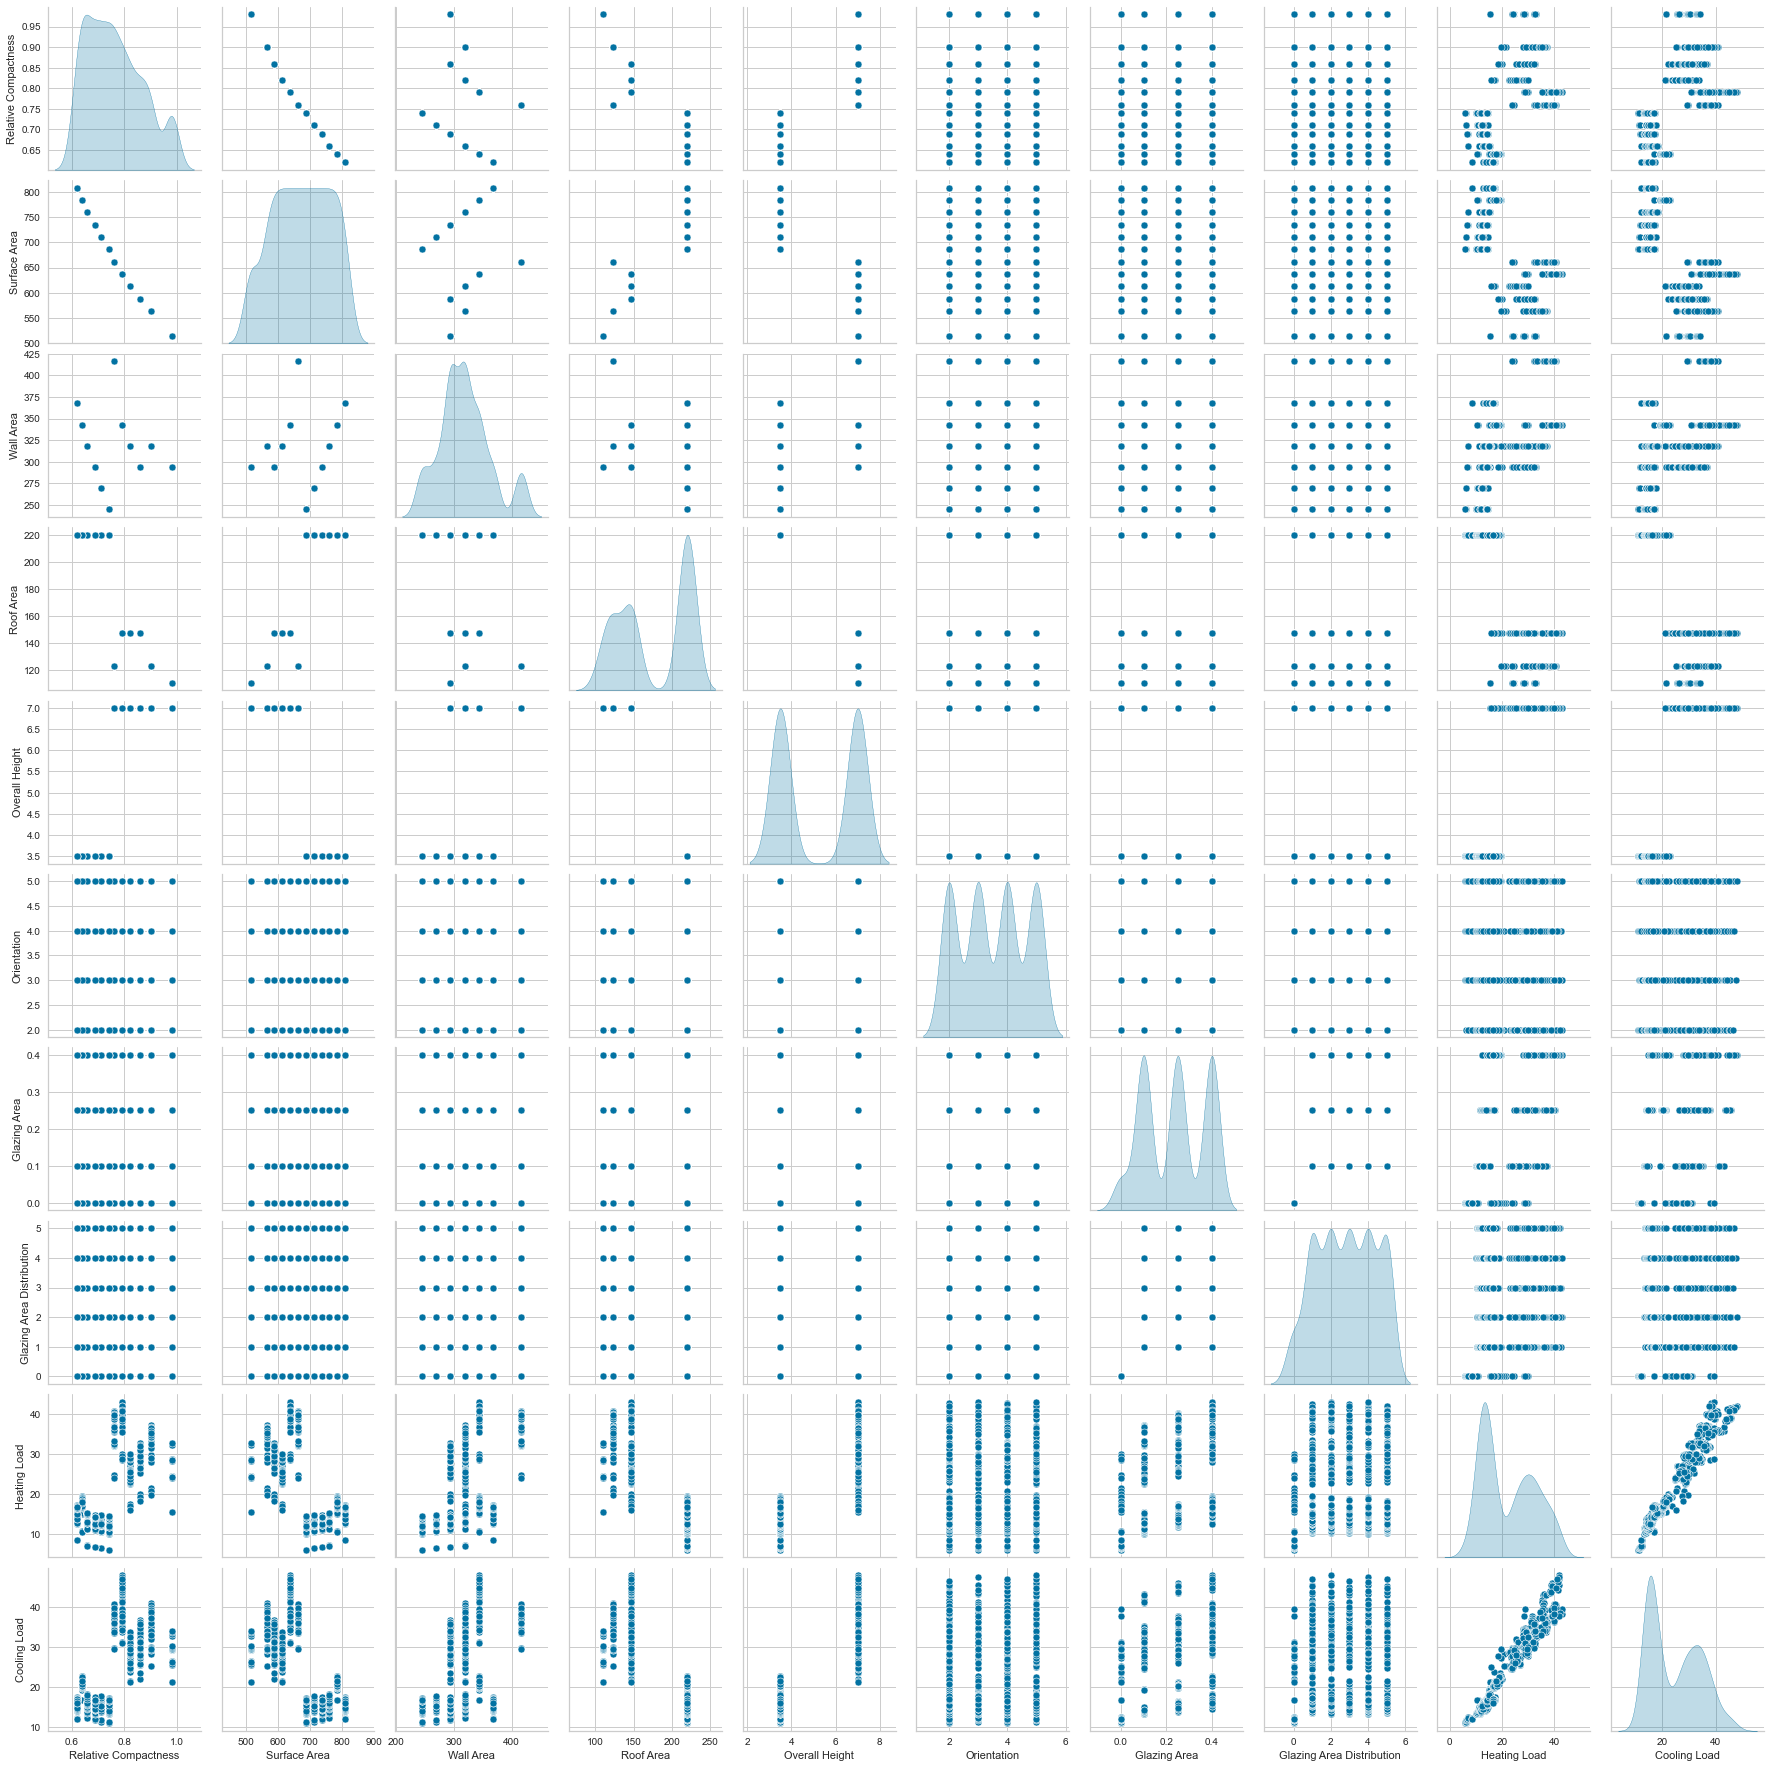

In [34]:
plt.figure(figsize=(15,10))
sns.pairplot(df1,diag_kind='kde')
plt.show()

1. There is realtionship between Relative Compactness with Surface Area and Wall Area.

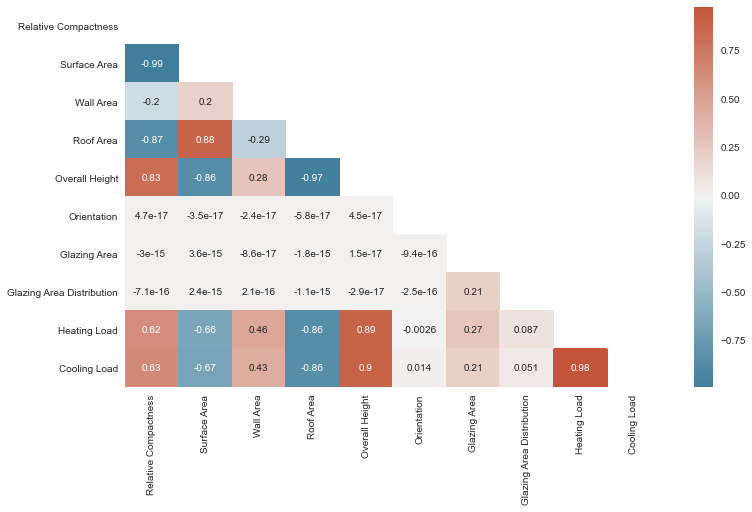

In [35]:
plt.figure(figsize=(12,7)) 
corr = df1.corr() 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr,annot=True,mask = mask,cmap = cmap) 
plt.show()

1. With the above heatmap, we can say there is high multicollienarity exist between features.

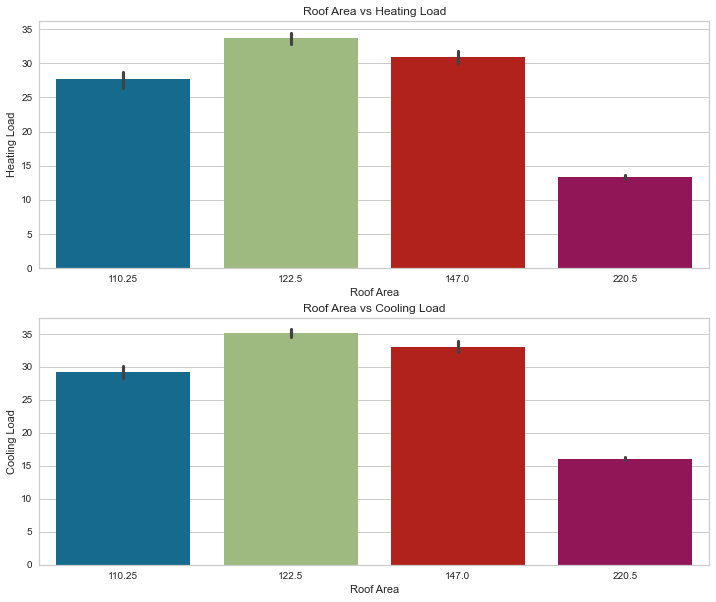

In [36]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Roof Area",y="Heating Load",data = df1,ax=ax[0])
sns.barplot(x="Roof Area",y="Cooling Load",data = df1, ax=ax[1])
ax[0].set_title("Roof Area vs Heating Load")
ax[1].set_title("Roof Area vs Cooling Load")
plt.show()

1. Heat Load & Cooling Load is higher for Roof Area of 122.5 and Lowest for 220.5

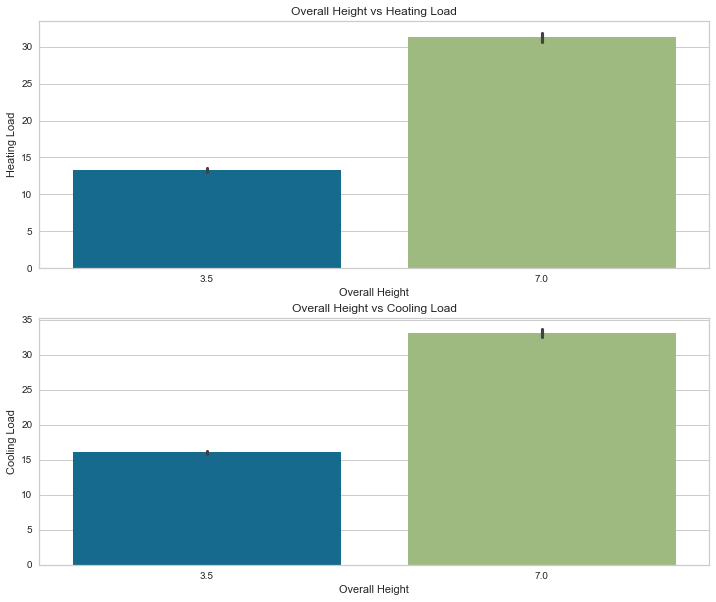

In [37]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Overall Height",y="Heating Load",data = df1,ax=ax[0])
sns.barplot(x="Overall Height",y="Cooling Load",data = df1, ax=ax[1])
ax[0].set_title("Overall Height vs Heating Load")
ax[1].set_title("Overall Height vs Cooling Load")
plt.show()

1. Heat Load & Cooling Load is higher for overall height of 7.

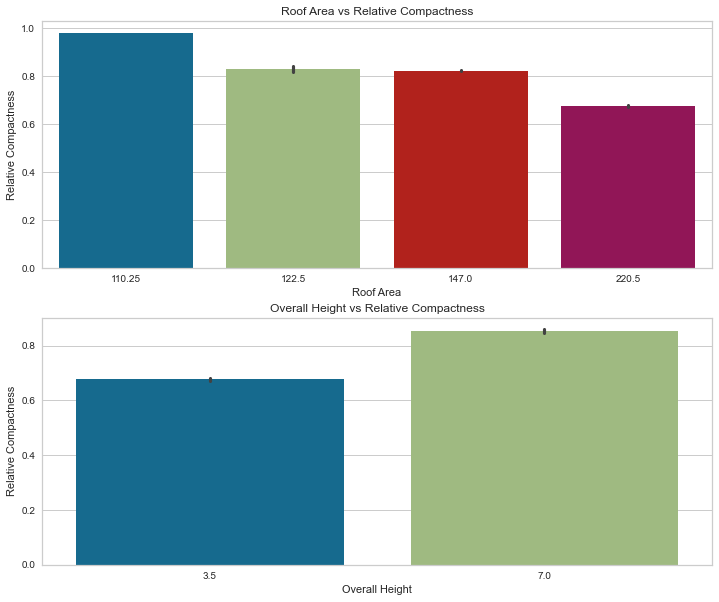

In [38]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Roof Area",y="Relative Compactness",data = df1,ax=ax[0])
sns.barplot(x="Overall Height",y="Relative Compactness",data = df1, ax=ax[1])
ax[0].set_title("Roof Area vs Relative Compactness")
ax[1].set_title("Overall Height vs Relative Compactness")
plt.show()

1. Relative Compactness is high for Roof Area of 110.25.
2. Relative Compactness is high for overall height of 7.

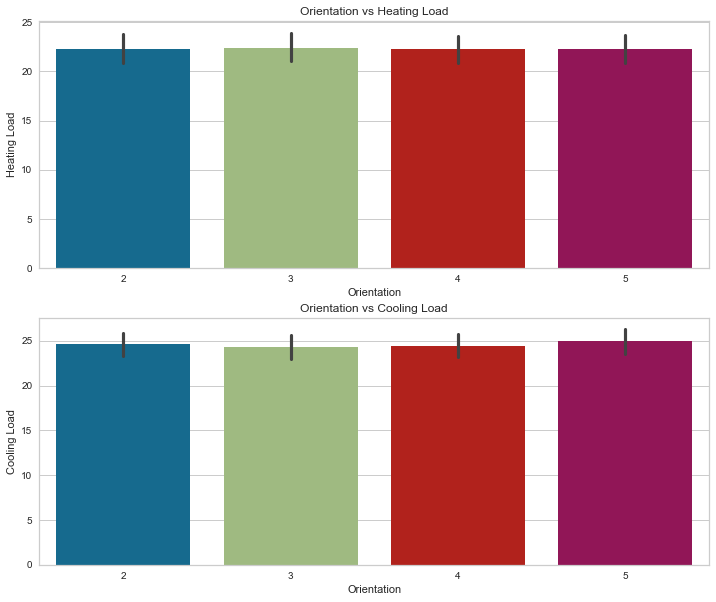

In [39]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Orientation",y="Heating Load",data = df1,ax=ax[0])
sns.barplot(x="Orientation",y="Cooling Load",data = df1, ax=ax[1])
ax[0].set_title("Orientation vs Heating Load")
ax[1].set_title("Orientation vs Cooling Load")
plt.show()

1. Heat Load and Cooling load is same for all orientation

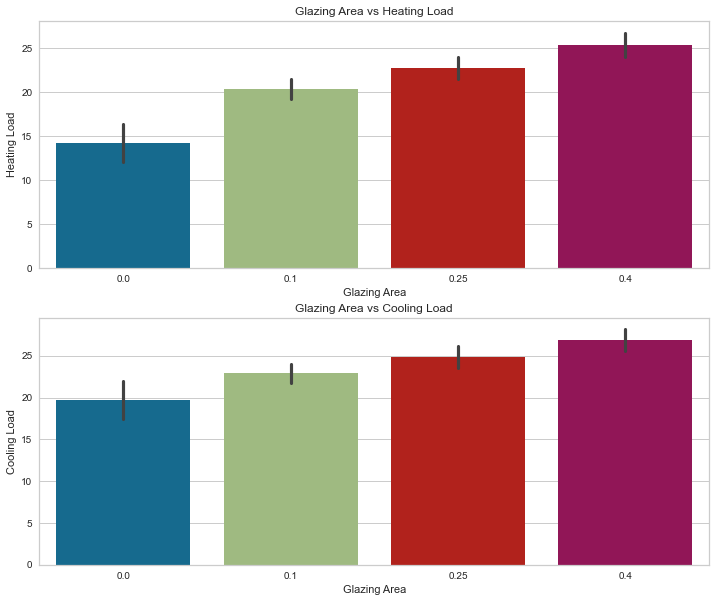

In [40]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="Glazing Area",y="Heating Load",data = df1,ax=ax[0])
sns.barplot(x="Glazing Area",y="Cooling Load",data = df1, ax=ax[1])
ax[0].set_title("Glazing Area vs Heating Load")
ax[1].set_title("Glazing Area vs Cooling Load")
plt.show()

1. Higher the glazing area, higher will be the heat load and cooling load requirement.

<AxesSubplot:>

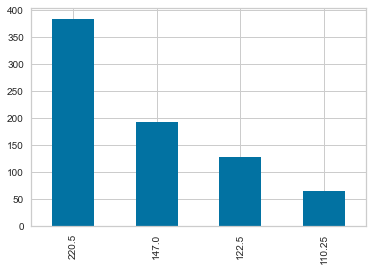

In [41]:
df1['Roof Area'].value_counts().sort_values(ascending=False).plot(kind='bar')

1. Most of the observation in data set have Roof Area of 220.5

<AxesSubplot:>

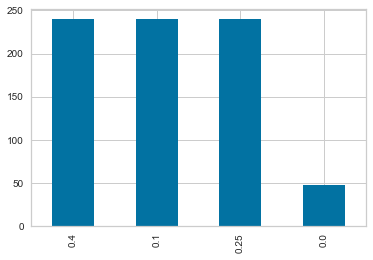

In [42]:
df1['Glazing Area'].value_counts().sort_values(ascending=False).plot(kind='bar')

1. Most of observations in data set contains some glazing area.

<AxesSubplot:>

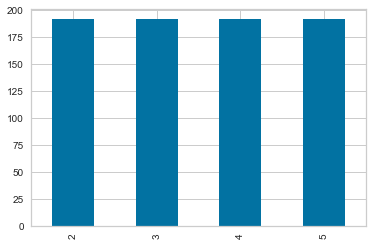

In [43]:
df1['Orientation'].value_counts().sort_values(ascending=False).plot(kind='bar')

1. All orientations have similar no. of observations.

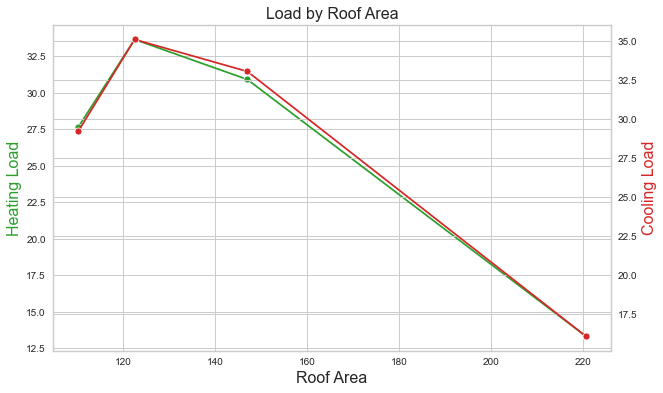

In [44]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Load by Roof Area', fontsize=16)
ax1.set_xlabel('Roof Area', fontsize=16)
ax1.set_ylabel('Heating Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Roof Area'], y=df1['Heating Load'], data = df1, sort=False, color=color,ci=None, marker='o')
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cooling Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Roof Area'], y=df1['Cooling Load'], data = df1, sort=False,color=color,ci=None, marker='o')
ax2.tick_params(axis='y', color=color)
plt.show()

1. Roof area greater than 122.5 reduces both heat load and cooling load requirement.

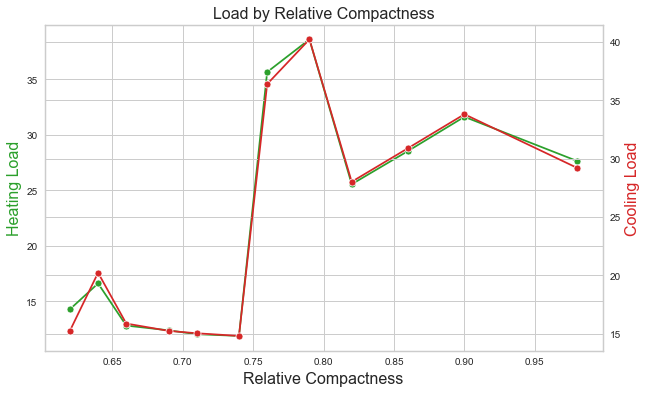

In [45]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Load by Relative Compactness', fontsize=16)
ax1.set_xlabel('Relative Compactness', fontsize=16)
ax1.set_ylabel('Heating Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Relative Compactness'], y=df1['Heating Load'], data = df1, sort=False, color=color,ci=None, marker='o')
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cooling Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Relative Compactness'], y=df1['Cooling Load'], data = df1, sort=False, color=color,ci=None, marker='o')
ax2.tick_params(axis='y', color=color)
plt.show()

1. Relative compactness greater than 0.73, requires high heat load and cooling load.

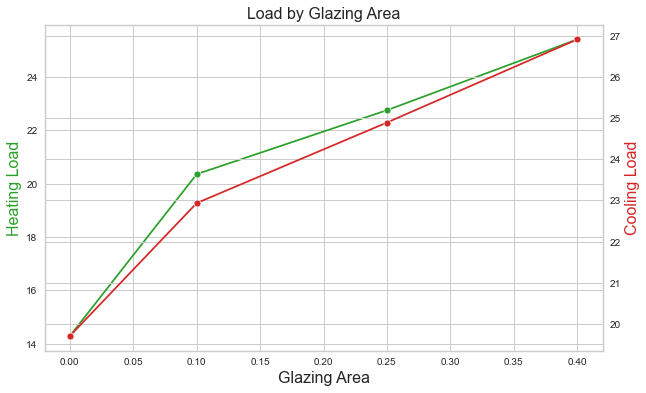

In [46]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Load by Glazing Area', fontsize=16)
ax1.set_xlabel('Glazing Area', fontsize=16)
ax1.set_ylabel('Heating Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Glazing Area'], y=df1['Heating Load'], data = df1, sort=False, color=color,ci=None, marker='o')
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cooling Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Glazing Area'], y=df1['Cooling Load'], data = df1, sort=False,color=color, ci=None, marker='o')
ax2.tick_params(axis='y', color=color)
plt.show()

1. Higher the glazing area, higher will be the heat load and cooling load requirement.

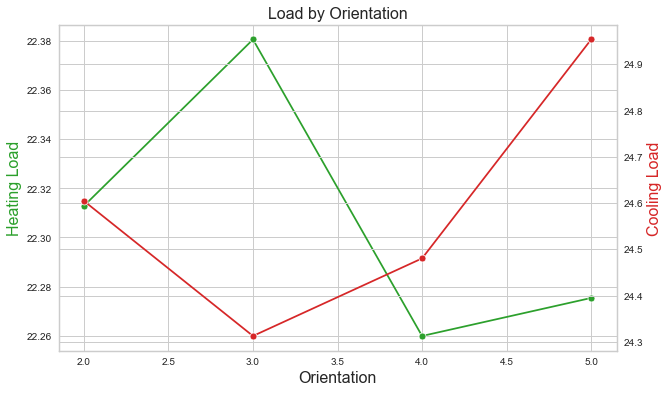

In [47]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Load by Orientation', fontsize=16)
ax1.set_xlabel('Orientation', fontsize=16)
ax1.set_ylabel('Heating Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Orientation'], y=df1['Heating Load'], data = df1, sort=False, color=color,ci=None, marker='o')
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cooling Load', fontsize=16, color=color)
ax2 = sns.lineplot(x=df1['Orientation'], y=df1['Cooling Load'], data = df1, sort=False,color=color, ci=None, marker='o')
ax2.tick_params(axis='y', color=color)
plt.show()

1. For orientation 3, cooling load is slightly lower than heat load.
2. For orientaiton 5, heat load is slighly lower than cooling load.